# Examen Módulo 2 - Montecarlo.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que, sobre todo, se está evaluando su capacidad de interpretar los resultados. Escriba sus **interpretaciones/conclusiones** en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.

---
### Simulación Montecarlo usando Caminata aleatoria<font size='1'>(5.1 puntos)</font>

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A**, **B** y **C**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 3 de cada 5 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 2 de cada 3 operaciones cambia al estado **A**, el resto de casos cambia al estado **B**.
* Estando en el estado **C**, 4 de cada 5 operaciones cambia al estado **A**, el resto de casos cambia al estado **B**.

Respresentado por el siguiente diagrama

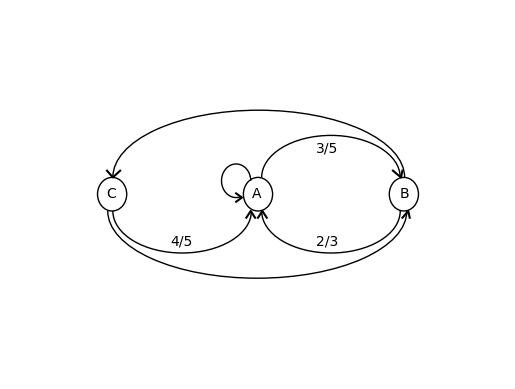

In [ ]:
# @markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

A = patches.Circle((0, 0), 0.1,fc='None',color='k')
B = patches.Circle((1, 0), 0.1,fc='None',color='k')
C = patches.Circle((-1,0), 0.1,fc='None',color='k')
AB = patches.Arc((0.5,   0.1 ), 0.95, 0.5,theta2=180,fc='None',color='k')
BA = patches.Arc((0.5,   -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
BC = patches.Arc((0.005, 0.1), 2.0, 0.8,theta2=180,fc='None',color='k')
CB = patches.Arc((-0.005, -0.1), 2.05, 0.8,theta1=180,fc='None',color='k')
CA = patches.Arc((-0.52, -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
AA = patches.Arc((-0.15, 0.08), 0.2,  0.2,theta2=290,fc='None',color='k')
ax = plt.gca()
ax.add_artist(A)
ax.add_artist(B)
ax.add_artist(C)
ax.add_artist(AB)
ax.add_artist(BA)
ax.add_artist(BC)
ax.add_artist(CB)
ax.add_artist(CA)
ax.add_artist(AA)

plt.plot([0.925,0.98,0.99],[0.14,0.1,0.14],'k')    # AB
plt.plot([0.06,0.03,0],[-0.14,-0.1,-0.14],'k')       # BA
plt.plot([-0.945,-0.995,-1.035],[0.14,0.1,0.14],'k') # BC
plt.plot([-0.02,-0.05,-0.08],[-0.14,-0.1,-0.14],'k') # CA
plt.plot([-0.15,-0.11,-0.15],[0.005,-0.02,-0.045],'k') # AA
plt.plot([0.99,1.03,1.04],[-0.14,-0.1,-0.14],'k') # CB

plt.text(-0.04,-0.02,'A')
plt.text(0.97,-0.02,'B')
plt.text(-1.04,-0.02,'C')
plt.text(0.4,0.25,'3/5')  # AB
plt.text(0.4,-0.3,'2/3') # BA
plt.text(-0.6,-0.3,'4/5') # CA

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

1. Usando caminata aleatoria, defina una función que permita simular el proceso antes descrito. <font size='1'>(2.6 puntos)</font>

Si le asignamos un valor a cada estado, tenemos que:
$A=0$,
$B=1$,
$C=2$.
Con esto podemos saber lo siguiente:

| Estado Base | Estado Destino | Probabilidad | Suma|
|---|---|---|---|
|A|A|2/5|0|
|A|B|3/5|+1|
|A|C|0/5|+2|
|B|A|2/3|-1|
|B|B|0/3|0|
|B|C|1/3|+1|
|C|A|4/5|-2|
|C|B|1/5|-1|
|C|C|0/5|0|


In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#Programamos con base en la info anterior:
def maq_est(estB,movimientos):
  t=[-2,-1,0,1,2]
  estado=estB
  for i in range(movimientos):
    if estado==0:
      p=[0,0,2/5,3/5,0]
    elif estado==1:
      p=[0,2/3,0,1/3,0]
    else:
      p=[4/5,1/5,0,0,0]
    estado+=np.random.choice(t,p=p)
  return estado

2. Si el proceso parte del estado **B**, y se ejecutan 300 operaciones. Calcule la probabilidad de que el proceso finalice donde empezó usando el método Montecarlo con 10000 escenarios. <font size='1'>(2.5 puntos)</font>

In [37]:
#Necesito la variable de Bernoulli para saber cuántos escenarios satisfacerían la condición que busco:
B=0
for i in range(10000): #pruebo la función máquina de estados
  B+=maq_est(1,300)==1 # Posibles escenarios iniciando y terminando en B con 300 operaciones
B/10000

np.float64(0.3533)

La probabilidad de que el proceso finalice donde empezó usando el método montecarlo con 10000 escenarios es del $35.33\%$ (ejecutando 300 operaciones)

---
### Probabilidad Precio-Umbral <font size='1'>(5.1 puntos)</font>

Suponga que desea invertir en **Tesla** o **Amazon**. Evalúe la probabilidad de obtener un retorno del 15% para Navidad desde el 12 de noviembre del presente año.

1. Obtenga los precios de cierre desde *YAHOO finance* de Tesla y Amazon desde el 11 de noviembre de 2020 al 11 de noviembre de 2025. <font size='1'>(0.8 puntos)</font>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

/tmp/ipython-input-29993153.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2020-11-11',end='2025-11-11')['Close']
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

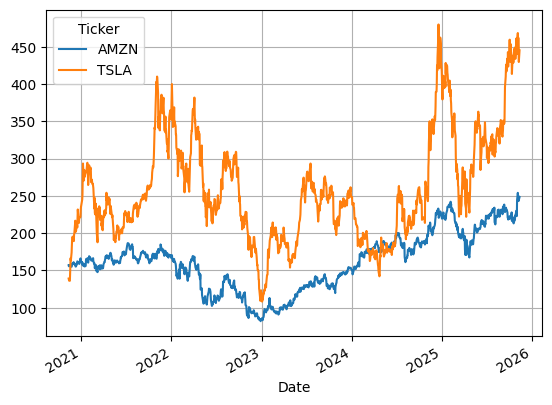

In [2]:
#Tesla = TSLA
#Amazon = AMZN
#Los importo como tickers:
tickers=['TSLA','AMZN']
data=yf.download(tickers,start='2020-11-11',end='2025-11-11')['Close']
data.plot(grid=True)

2. Calcule el rendimiento simple para ambas empresas.  <font size='1'>(0.5 puntos)</font>

<Axes: xlabel='Date'>

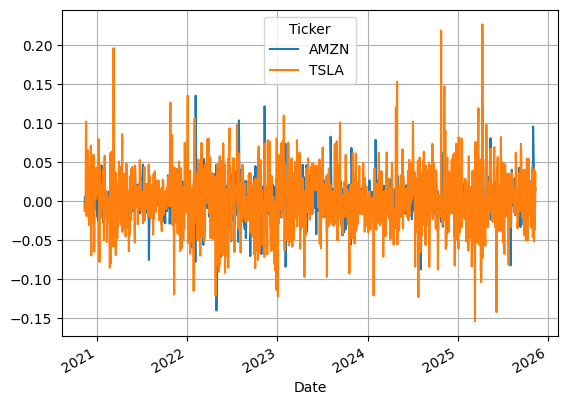

In [3]:
delta=data.pct_change().dropna()
delta.plot(grid=True)

In [4]:
#Observo que es constante

array([[<Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'TSLA'}>]], dtype=object)

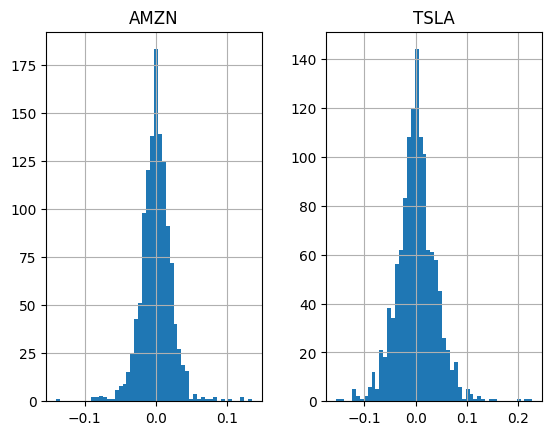

In [5]:
delta.hist(bins=50,grid=True)

In [6]:
#Observo que son normales y sin cesgos importantes.

4. Calcule la media y desviación estandar de los rendimientos y simule 10000 escenarios de rendimientos del 12 de noviembre al 25 de diciembre de 2025.  <font size='1'>(1.6 puntos)</font>

In [12]:
med_T=delta['TSLA'].mean()
std_T=delta['TSLA'].std()
med_A=delta['AMZN'].mean()
std_A=delta['AMZN'].std()
med_T,std_T,med_A,std_A

(np.float64(0.0016699422668417971),
 0.03865608861730573,
 np.float64(0.0006094908265333825),
 0.0220593228413655)

In [9]:
#Veo que Tesla tiene una media de 0.00167 y una desviación estándar de 0.03866
#Veo que Amazon tiene una media de 0.00061 y una desviación estándar de 0.2206

In [13]:
def simul(delta,empresa,N_dias,N_escenarios):
  #N_dias = 44 porque va del 12 de nov al 25 de dic.
  #N_escenarios es mejor si es un no. grande, ej. 10000
  delta_emp=np.random.normal(delta[empresa].mean(),delta[empresa].std(),(N_dias,N_escenarios))
  rango_tiempo=pd.date_range('2025-11-12',periods=N_dias)
  delta_emp=pd.DataFrame(delta_emp,index=rango_tiempo)
  return delta_emp

In [15]:
simul_T=simul(delta,'TSLA',44,10000) #10 mil escenarios
simul_T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-11-12,0.049877,-0.000604,0.016599,0.036819,-0.037455,-0.015304,0.000511,0.009271,-0.071459,-0.062272,...,-0.060716,0.021252,-0.011480,-0.087845,0.013918,0.017373,0.050974,0.005255,0.029845,-0.014288
2025-11-13,-0.055655,0.095099,0.030611,-0.009479,0.055183,0.023502,-0.055721,-0.033878,-0.040511,-0.007058,...,0.015289,0.004594,0.033765,-0.041067,0.047937,0.018982,0.002129,-0.043593,-0.007467,-0.013203
2025-11-14,-0.008312,-0.022085,0.067596,0.038583,0.015854,-0.058764,0.009924,-0.042391,-0.024634,0.013602,...,0.010568,-0.033271,0.009909,0.021279,0.016229,0.022215,-0.002173,0.011869,-0.012689,-0.014746
2025-11-15,0.006071,-0.019346,0.068692,0.034366,-0.030731,0.066497,0.003133,0.035305,-0.011367,0.040989,...,0.011538,-0.027309,0.046805,0.013802,0.022918,-0.002878,0.006252,0.026369,-0.007850,-0.019311
2025-11-16,-0.082149,0.079787,0.030857,-0.031555,-0.022296,0.003624,0.031179,0.053444,0.007924,0.022720,...,-0.039676,-0.017277,0.045925,0.030206,0.095727,-0.007883,0.002084,0.015489,-0.026953,0.024491
2025-11-17,0.007850,0.025997,0.012636,0.014173,-0.000543,-0.027610,-0.036457,0.031249,-0.079002,-0.002889,...,-0.003262,-0.011062,-0.007722,0.036557,0.008263,-0.050911,0.025704,-0.023809,0.017358,0.025380
2025-11-18,0.100252,-0.001016,0.032681,-0.012268,0.041790,0.036613,-0.015116,0.014473,-0.022578,0.065116,...,0.076052,0.040399,0.021266,0.034831,0.046453,-0.049456,0.036599,0.040327,0.046075,-0.006539
2025-11-19,0.031433,-0.014920,0.009649,-0.020831,0.015585,0.028088,-0.014640,0.010314,-0.032687,-0.048865,...,0.005842,0.025822,0.065404,0.026334,0.064087,0.010175,-0.027343,0.032745,0.018384,-0.007658
2025-11-20,0.014858,-0.032377,0.019250,0.014983,0.045182,0.006173,0.034239,0.029703,-0.013597,0.004455,...,0.052560,-0.089429,-0.048601,-0.047519,0.036796,0.074359,0.002957,0.058760,0.008374,-0.012563
2025-11-21,0.033332,0.037104,0.024931,0.066951,-0.049059,0.044468,0.075938,-0.036852,0.031067,0.046864,...,-0.050035,0.025250,0.028854,-0.032760,-0.011159,0.084767,-0.034948,-0.013212,-0.063833,0.015699


In [16]:
simul_A=simul(delta,'AMZN',44,10000) #10 mil escenarios
simul_A

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-11-12,-0.045642,-0.036464,-0.031144,0.016383,0.018104,-0.041041,-0.006460,-0.008585,0.002304,-0.010268,...,0.014602,-0.037597,0.031264,0.004763,0.007104,0.007538,0.024380,-0.029795,-0.006727,0.012475
2025-11-13,0.004241,-0.008480,-0.007876,0.008752,-0.025250,0.001459,0.005967,0.016606,0.022133,0.005252,...,-0.004348,-0.023361,-0.016164,-0.019305,0.045992,0.005131,0.018677,-0.009750,-0.052277,0.006584
2025-11-14,0.022389,0.002573,0.056556,-0.029682,0.007118,0.008902,-0.003421,-0.033817,0.045144,0.003107,...,0.032657,0.031709,-0.001183,0.008247,-0.007888,0.006205,-0.030256,-0.023416,-0.000534,0.015172
2025-11-15,-0.017315,0.022491,0.009701,-0.035151,0.037313,-0.020115,0.032024,-0.009091,0.006149,-0.019180,...,0.008570,-0.010472,-0.002072,0.008767,0.029744,0.012066,-0.007510,-0.004910,0.013879,0.001276
2025-11-16,0.047545,0.001412,0.021396,0.011945,-0.019031,-0.015660,0.024458,-0.004057,-0.008993,-0.030247,...,0.013332,-0.018974,-0.015235,-0.047009,-0.042166,0.008208,-0.010052,-0.033069,-0.031321,0.004583
2025-11-17,0.035693,-0.046554,0.013234,0.012220,-0.020388,0.013771,-0.017895,0.036435,-0.052054,-0.010698,...,0.006785,0.018212,-0.023045,0.010976,-0.007849,0.008894,0.010964,0.005209,-0.000156,0.007806
2025-11-18,-0.006323,0.020033,0.018768,-0.015768,-0.011687,0.014593,-0.003083,-0.001290,-0.014686,0.032457,...,0.020217,-0.034925,0.018039,0.013687,-0.032181,-0.014011,0.026329,0.004760,-0.002184,-0.009152
2025-11-19,0.051120,-0.025343,-0.012302,0.020087,0.010107,-0.034272,-0.003039,0.028542,0.018676,-0.044200,...,-0.042574,-0.008522,0.017629,0.015308,-0.023269,-0.003720,-0.015700,0.006988,0.021327,0.012760
2025-11-20,-0.010107,-0.030871,0.026206,0.008766,-0.007302,-0.013579,0.046496,0.019924,-0.015116,0.018836,...,0.025566,-0.009608,-0.003166,0.008314,-0.023211,-0.015055,0.005505,0.014830,-0.028308,-0.016795
2025-11-21,0.002615,0.016810,0.028005,-0.010197,-0.011165,-0.004967,0.022566,-0.035800,-0.017502,-0.021655,...,0.018284,-0.004727,0.021563,-0.038210,0.007642,0.002073,0.012886,0.015529,0.004595,0.009274


5. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas.  <font size='1'>(1 punto)</font>

In [20]:
def precios(delta,empresa,N_dias,N_escenarios):
  delta_emp=simul(delta,empresa,N_dias,N_escenarios)
  precios_emp=data[empresa].iloc[-1]*(delta_emp+1).cumprod()
  return precios_emp

In [21]:
precios(delta,'TSLA',44,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-11-12,425.236098,458.558356,434.964494,445.058940,441.739825,451.041761,437.416927,442.911314,448.925738,449.585348,...,454.665856,436.652145,447.751558,437.380161,460.801024,417.964766,441.210502,458.922875,432.898221,448.835041
2025-11-13,437.809740,444.789684,459.944033,433.038518,426.553516,447.041178,462.981210,476.797778,460.750980,440.292921,...,440.503761,429.929056,451.026305,445.655341,461.984740,382.117533,439.283988,448.328829,439.111165,456.886044
2025-11-14,384.747431,430.553805,466.787029,452.411720,404.263736,473.539219,468.647691,488.267342,475.913819,431.890142,...,447.073895,436.414439,458.682192,447.593628,454.894289,383.108011,416.933125,459.025739,433.725014,427.472414
2025-11-15,384.364684,434.742855,483.472539,464.950975,378.917672,457.461186,491.464754,476.232788,471.280575,449.729339,...,442.392317,451.118984,448.246316,427.151161,436.123095,371.473202,439.109281,470.743357,427.081309,427.158623
2025-11-16,369.668254,431.708458,508.876368,460.283534,390.912893,459.050081,470.553769,484.118107,462.824893,451.668061,...,440.945947,467.233470,453.497646,425.007585,450.648771,358.913686,453.067535,451.078698,432.732875,424.699504
2025-11-17,376.649304,438.056557,504.793510,444.945912,389.904100,438.735861,481.856291,500.769949,440.027449,450.204165,...,464.248257,472.589954,472.678973,402.303586,429.492586,360.653834,429.219744,452.657763,471.030984,420.062668
2025-11-18,385.278321,439.150307,488.597381,454.475176,385.944064,436.094413,462.632956,483.322879,458.435414,419.597396,...,460.431439,432.232030,481.536340,428.689715,423.952384,335.615548,442.840054,438.250972,459.695632,423.328238
2025-11-19,384.174814,454.167741,467.889038,467.588532,354.596336,415.728239,460.079316,461.073670,466.528670,427.436037,...,447.933095,390.392977,503.775809,397.969244,444.386299,368.180841,440.506227,412.107169,473.813678,441.048358
2025-11-20,387.161678,479.062589,469.364200,456.683818,363.866829,419.300305,462.672875,413.797611,473.297423,429.674936,...,483.310634,392.073841,514.690705,389.485102,480.224671,358.549242,426.126802,410.223415,474.484719,441.211915
2025-11-21,401.444108,488.899190,482.820484,460.294120,364.995707,441.271912,478.515745,423.016116,476.145068,424.739700,...,471.699085,379.052768,506.278715,409.502296,498.844917,360.754079,429.284643,419.385892,505.488958,441.788180


In [22]:
precios(delta,'AMZN',44,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-11-12,248.432553,255.975396,252.437440,255.512697,250.696814,243.053928,254.845385,242.834544,249.818936,249.073901,...,257.537421,249.650042,250.018731,245.835739,252.838375,239.210294,249.086320,248.526988,241.889940,251.546125
2025-11-13,247.976096,246.285507,245.013989,264.149511,261.653410,244.892237,258.529889,245.801421,248.859682,254.265751,...,263.470300,248.140345,242.738008,242.910295,246.024811,242.061532,253.254544,237.356280,243.045632,259.402927
2025-11-14,240.454374,250.273125,251.383032,253.977413,256.122889,249.495556,262.043983,244.652721,248.459263,252.818334,...,268.173746,244.369895,245.482986,246.911556,244.485271,243.635370,251.196395,237.850990,243.841681,263.333723
2025-11-15,236.560878,251.234154,248.870948,254.836421,255.080055,251.626096,275.715952,244.361751,250.034027,243.328841,...,255.589810,246.457193,243.103359,241.984153,250.039924,243.309871,252.858326,235.752562,237.256395,263.660704
2025-11-16,239.468360,255.491571,256.200244,256.236852,252.125246,252.541776,264.783507,248.458976,244.827007,236.997323,...,252.096476,247.159620,245.387939,244.872515,253.537256,239.777524,251.927889,246.809767,231.172520,256.107553
2025-11-17,239.339077,246.452101,260.038119,253.423063,259.203671,256.425429,268.628391,262.053391,248.383995,234.586759,...,265.552960,256.586643,244.970412,242.517846,261.666889,239.566889,244.643524,243.433635,229.181642,251.996595
2025-11-18,238.875776,251.857413,262.284650,261.334574,258.524536,261.226049,266.142916,253.675125,241.318964,238.168980,...,266.848479,257.372999,242.908072,243.785846,260.209935,238.434972,238.989591,251.657539,233.963019,258.046070
2025-11-19,230.726461,254.671956,260.229927,262.773562,254.865442,276.009972,260.217456,249.986068,246.746550,244.387489,...,282.364682,272.535416,249.943647,248.567388,256.564914,239.413471,247.781455,251.377594,239.239038,261.924611
2025-11-20,237.600983,251.174982,256.336046,256.824128,254.198861,276.036798,263.130450,253.706365,251.962997,245.234365,...,279.365029,273.442035,250.962028,244.474578,260.754155,234.041095,246.678999,248.641629,235.448483,254.069116
2025-11-21,234.618564,249.304444,263.269639,257.389698,255.973230,276.418546,255.212420,259.092092,257.500161,253.363114,...,277.141792,273.870837,239.847860,241.406907,270.102019,240.606211,244.587920,250.136378,236.417782,253.849165


6. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 15% a partir de la fecha indicada. ¿Cuál genera mayores espectativas?  <font size='1'>(1.2 puntos)</font>

In [23]:
def porcentaje(delta,empresa,N_dias,N_escenarios,porc):
  precios_emp=precios(delta,empresa,N_dias,N_escenarios)
  # B_emp = Variable de Bernoulli para la empresa
  B_emp=precios_emp>data[empresa].iloc[-1]*(1+porc/100)
  proba_emp=B_emp.mean(axis=1)
  return proba_emp

/tmp/ipython-input-3008691462.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proba_T[-1] #probabilidad al 25 de diciembre


np.float64(0.346)

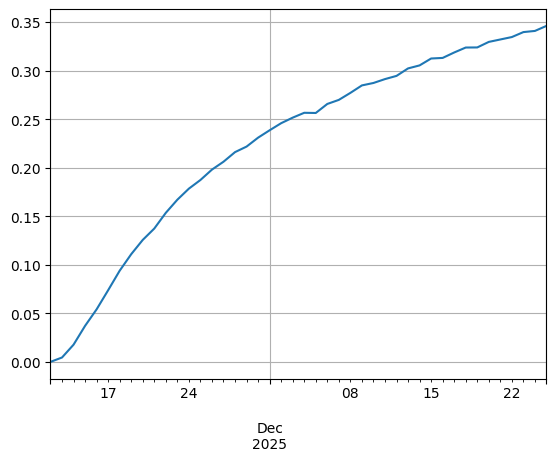

In [30]:
proba_T=porcentaje(delta,'TSLA',44,10000,15)
proba_T.plot(grid=True)
proba_T[-1] #probabilidad al 25 de diciembre

/tmp/ipython-input-1087548860.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proba_A[-1] #probabilidad al 25 de diciembre


np.float64(0.1929)

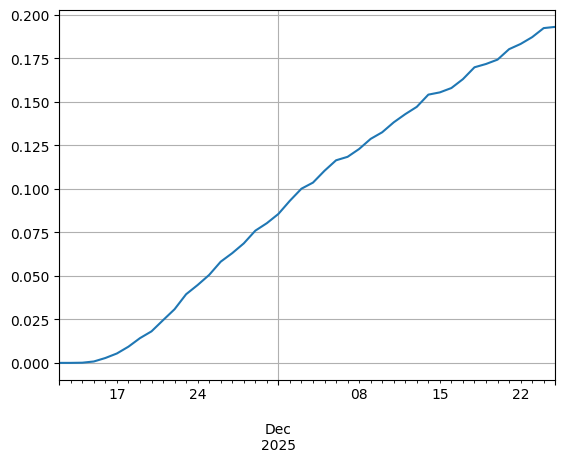

In [34]:
proba_A=porcentaje(delta,'AMZN',44,10000,15)
proba_A.plot(grid=True)
proba_A[-1] #probabilidad al 25 de diciembre

**Tesla** supera el 30% (34.60%) de probabilidad de obtener un retornodel $15\%$ para el 25 de diciembre, mientras que **Amazon** se queda por debajo del 20% (19.29%).